In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import sys
sys.path.append('..')
import utils
import features
import knn

In [2]:
record_names = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
dim_amount = 5 * 5
data_amount = 14
record_folder = 'record_ondesk'
euclid_dists = pd.DataFrame(columns=['tt','ti','tm','tr','tp'
    ,'it','ii','im','ir','ip'
    ,'mt','mi','mm','mr','mp'
    ,'rt','ri','rm','rr','rp'
    ,'pt','pi','pm','pr','pp'
    ,'label']
)

In [3]:
for record_name in record_names:
    data_amount = utils.get_last_index_from_folder('../{0}/{1}'.format(record_folder, record_name)) + 1    
    word_euclid_dists = features.get_feature_tip_distance(record_folder, record_name, data_amount)

    euclid_dists = euclid_dists.append(word_euclid_dists)
#     if(words.size == 0):
#         words = tip_distance
#     else:
#         words = np.append(words, tip_distance)
        
# words = words.reshape((10,14,25))

In [4]:
from sklearn.model_selection import train_test_split
x = np.array(euclid_dists.iloc[:, 0:25])
y = np.array(euclid_dists['label'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(record_names)

y_encode = le.transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_encode, test_size= 0.2)

In [5]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
pred = knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, pred))

1.0


In [2]:
records_name = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
dim_amount = 5 * 5
train_tip_dist = np.zeros([dim_amount,0])
test_tip_dist = np.zeros([dim_amount,0])
training_data_amount = 4
maximum_data_amount = 14

In [3]:
for record_name in records_name:
    data_amount = utils.get_last_index_from_folder('../record/{0}'.format(record_name)) + 1    

    tip_distance = features.get_feature_tip_distance(record_name, data_amount)
    
    for i in range(tip_distance.shape[1]):
        if i < training_data_amount:
            train_tip_dist = np.append(train_tip_dist, tip_distance[:, i].reshape(dim_amount, 1), axis = 1)
        elif i < maximum_data_amount:
            test_tip_dist = np.append(test_tip_dist, tip_distance[:, i].reshape(dim_amount, 1), axis = 1)

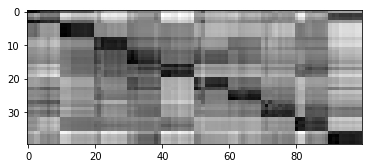

In [4]:
sim_mat = knn.create_similarity_matrix(train_tip_dist, test_tip_dist)

plt.imshow(sim_mat,cmap="gray") 
plt.show() 

In [5]:
label_flags = knn.get_label_flags(sim_mat)

In [6]:
roc, FAR_list, FNR_list, _ = knn.plot_roc(sim_mat, label_flags, title="RoC")
# eer = get_eer(FAR_list, FNR_list)
# recall_rate = get_recall_rate(roc, percent_far = 0.1)
# print("EER for this RoC is {0}\nRecall Rate is {1}".format(eer,recall_rate))

5.07246794656 19.3916877842
5.07246794656 14.6403254804
5.07246794656 18.2000149656
5.07246794656 39.3252372475
5.07246794656 83.3827591175
5.07246794656 83.8545611543
5.07246794656 89.295117933
5.07246794656 80.56375758
5.07246794656 95.8272640276
5.07246794656 87.3521701911
5.07246794656 136.957280831
5.07246794656 137.780355333
5.07246794656 134.372265921
5.07246794656 121.025625735
5.07246794656 123.571621056
5.07246794656 119.372783025
5.07246794656 117.921248146
5.07246794656 117.10259752
5.07246794656 122.016593215
5.07246794656 126.255654667
5.07246794656 205.918826286
5.07246794656 172.574811187
5.07246794656 210.295787884
5.07246794656 231.577674444
5.07246794656 236.702564192
5.07246794656 236.515593474
5.07246794656 242.102909199
5.07246794656 234.295437755
5.07246794656 234.780338263
5.07246794656 236.682283906
5.07246794656 171.883022344
5.07246794656 185.23364465
5.07246794656 171.060008228
5.07246794656 181.521678282
5.07246794656 180.261652385
5.07246794656 179.7034151

ZeroDivisionError: division by zero

In [10]:
for i in range(10):
    print(i+1)
    print(train_tip_dist[:, i*3:(i*3)+3])

1
[[  73.55315448   88.05780992   84.88011667]
 [ 100.86573642  115.06837145  108.22532389]
 [  19.62475272   25.6277414    17.67561306]
 [  16.89539866   17.4748099    16.33451514]
 [  51.0049081    50.4682042    65.20873846]]
2
[[ 95.47409702  97.47274133  93.74317768]
 [ 45.58097198  44.31670651  46.7182282 ]
 [ 86.38279832  90.00851401  98.94497342]
 [ 18.45593728  22.26768392  17.27846985]
 [ 28.40919555  22.1997929   36.76496093]]
3
[[ 116.68773234  119.336014    125.72690096]
 [  40.51363251   38.785587     41.60065131]
 [ 100.95807293   98.91354513  102.30543111]
 [  34.8506217    38.39472124   32.50782416]
 [ 123.55447798  125.47598698  131.39603514]]
4
[[  86.70993012   93.14783339   95.07789096]
 [  44.21868307   42.74620548   37.66222153]
 [  42.95055939   44.12380898   45.29254648]
 [  46.95758393   45.32996226   47.03846588]
 [ 110.18066621   93.75416356   90.0664614 ]]
5
[[  84.60633542   79.14915137   81.89439171]
 [  31.70356597   33.23498442   33.87368035]
 [  29.7575

In [23]:
for i in range(10):
    print(i+1)
    print(test_tip_dist[:, i*7:(i*7)+7])

1
[[  90.48093416   89.53822754   81.80168777   85.48797506   86.17135635
    85.16881143   80.68079241]
 [ 115.30455778  117.06691512  112.63884321  110.63603568  112.65014573
   104.90426934  105.89815895]
 [  19.12907671   19.09917902   19.22339973   21.86959466   18.75476463
    23.61126331   23.11400896]
 [  16.94293247   16.5154907    16.40590779   16.2653443    16.3865454
    17.03392675   16.08292641]
 [  48.39431777   58.10035764   58.6272897    47.48539117   53.64316603
    40.06339744   44.52067081]]
2
[[ 97.59570583  97.15711022  99.86568136  99.68111498  97.65784013
   97.85476621  98.20623979]
 [ 45.95001262  47.81750333  48.33608776  49.31402588  47.38633754
   46.76987765  46.92424642]
 [ 96.03179629  85.64731193  85.99245416  84.49340197  84.60197551
   91.02742369  88.91102428]
 [ 17.84616852  19.07527272  18.61206033  19.94102739  20.98222419
   21.98623134  21.32155053]
 [ 29.41014836  25.60141591  24.3520566   25.51682404  24.18689587
   25.98954465  27.64469549]]
